# Generate Datasets

In [1]:
import torch
import matplotlib.pyplot as plt


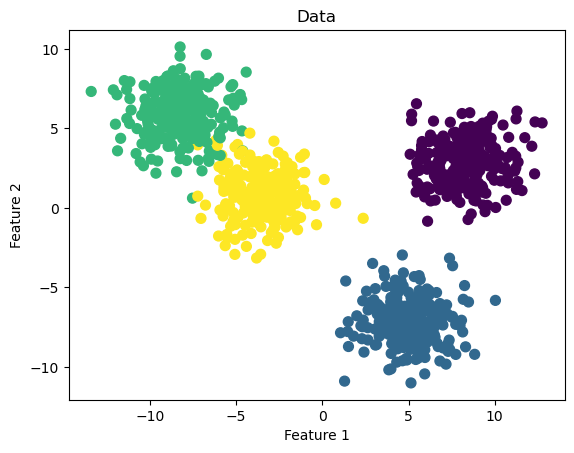

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 1000,
                  n_features = 2, # number of features
                  centers = 4, # number of class
                  cluster_std = 1.5, # give clusters a little noise
                  random_state = 77)
X[:10], y[:10]
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title("Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
X_train = torch.from_numpy(X_train).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)
X_test = torch.from_numpy(X_test).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

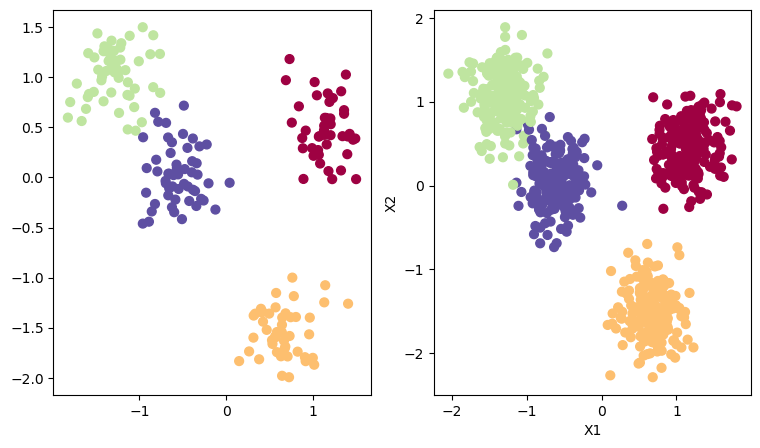

((1000, 2), (1000,))

In [6]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(9, 5))

ax[0].scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 40, cmap = plt.cm.Spectral)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 40, cmap = plt.cm.Spectral)
plt.xlabel( 'X1')
plt.ylabel( 'X2')
plt.show()
X.shape, y.shape


# Build Models

In [33]:
class Softmax_model(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.block_1 = torch.nn.Linear(input_dim, output_dim)
        

    def forward(self, x):
        z1 = self.block_1(x)
        return z1
    
model = Softmax_model(input_dim=2, output_dim=4)
print(model)

Softmax_model(
  (block_1): Linear(in_features=2, out_features=4, bias=True)
)


In [34]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.3)

In [35]:
epochs_count = []
train_loss_values = []
test_loss_values = []
epochs = 100

for epoch in range(epochs):
    model.train()

    # Forward pass
    z = model(X_train)

    # Compute loss
    training_loss1 = loss_function(z.squeeze(), y_train)


    # Calculate gradients
    optimizer.zero_grad()
    training_loss1.backward()

    # Update weights
    optimizer.step()

    model.eval()
    with torch.no_grad():
        # Forward pass
        z_test = model(X_test)

        # Compute loss
        test_loss1 = loss_function(z_test.squeeze(), y_test)
        
       
    # Store loss values
    epochs_count.append(epoch)
    train_loss_values.append(training_loss1.item())
    test_loss_values.append(test_loss1.item())

    # Print loss values
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {training_loss1.item():.4f}, Test Loss: {test_loss1.item():.4f}")

Epoch 1/100, Training Loss: 1.3176, Test Loss: 1.1993
Epoch 2/100, Training Loss: 1.1984, Test Loss: 1.1082
Epoch 3/100, Training Loss: 1.1033, Test Loss: 1.0336
Epoch 4/100, Training Loss: 1.0255, Test Loss: 0.9711
Epoch 5/100, Training Loss: 0.9604, Test Loss: 0.9179
Epoch 6/100, Training Loss: 0.9050, Test Loss: 0.8718
Epoch 7/100, Training Loss: 0.8571, Test Loss: 0.8314
Epoch 8/100, Training Loss: 0.8153, Test Loss: 0.7957
Epoch 9/100, Training Loss: 0.7784, Test Loss: 0.7638
Epoch 10/100, Training Loss: 0.7457, Test Loss: 0.7352
Epoch 11/100, Training Loss: 0.7163, Test Loss: 0.7093
Epoch 12/100, Training Loss: 0.6899, Test Loss: 0.6858
Epoch 13/100, Training Loss: 0.6659, Test Loss: 0.6643
Epoch 14/100, Training Loss: 0.6440, Test Loss: 0.6445
Epoch 15/100, Training Loss: 0.6240, Test Loss: 0.6262
Epoch 16/100, Training Loss: 0.6055, Test Loss: 0.6093
Epoch 17/100, Training Loss: 0.5885, Test Loss: 0.5935
Epoch 18/100, Training Loss: 0.5727, Test Loss: 0.5788
Epoch 19/100, Train

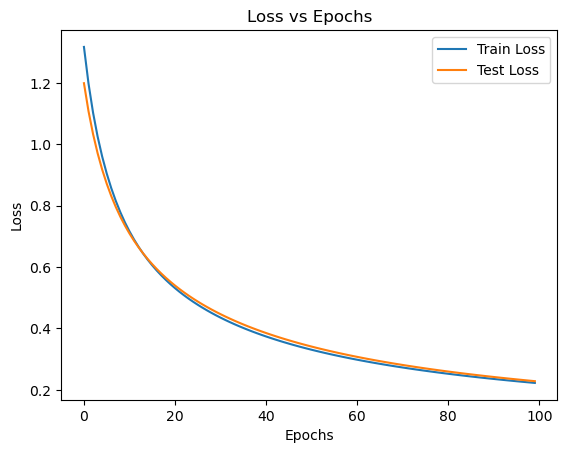

In [36]:
import matplotlib.pyplot as plt
plt.plot(train_loss_values, label='Train Loss')
plt.plot(test_loss_values, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

## Plot

In [37]:
x1 = X_train[:, 0]
x2 = X_train[:, 1]
x1.shape, x2.shape

(torch.Size([800]), torch.Size([800]))

In [52]:
# Create a meshgrid for the decision plane
x1_range = torch.linspace(min(x1), max(x1), 3)
x2_range = torch.linspace(min(x2), max(x2), 3)
X1_mesh, X2_mesh = torch.meshgrid(x1_range, x2_range)

grid = torch.stack((X1_mesh, X2_mesh), dim=-1).reshape(-1, 2)

Z_mesh = model(grid)
Z_mesh_ = Z_mesh.reshape(3,3,4)
X1_mesh, X2_mesh, Z_mesh, Z_mesh_

(tensor([[-2.0468, -2.0468, -2.0468],
         [-0.1214, -0.1214, -0.1214],
         [ 1.8039,  1.8039,  1.8039]]),
 tensor([[-2.2859, -0.1991,  1.8877],
         [-2.2859, -0.1991,  1.8877],
         [-2.2859, -0.1991,  1.8877]]),
 tensor([[-7.3542,  3.0256, -1.1813,  3.8735],
         [-4.7843, -1.7391,  2.5613,  3.1894],
         [-2.2143, -6.5037,  6.3040,  2.5053],
         [-3.0401,  4.7028, -4.4457,  1.8062],
         [-0.4701, -0.0618, -0.7031,  1.1221],
         [ 2.0998, -4.8264,  3.0396,  0.4379],
         [ 1.2741,  6.3801, -7.7101, -0.2611],
         [ 3.8440,  1.6155, -3.9675, -0.9452],
         [ 6.4140, -3.1491, -0.2248, -1.6294]], grad_fn=<AddmmBackward0>),
 tensor([[[-7.3542,  3.0256, -1.1813,  3.8735],
          [-4.7843, -1.7391,  2.5613,  3.1894],
          [-2.2143, -6.5037,  6.3040,  2.5053]],
 
         [[-3.0401,  4.7028, -4.4457,  1.8062],
          [-0.4701, -0.0618, -0.7031,  1.1221],
          [ 2.0998, -4.8264,  3.0396,  0.4379]],
 
         [[ 1.2741,  6.

In [ ]:
Z_mesh = Z_mesh.reshape(30,30,4)
Z_mesh.shape


torch.Size([30, 30, 4])

In [44]:
X1_mesh.shape, X2_mesh.shape

(torch.Size([30, 30]), torch.Size([30, 30]))

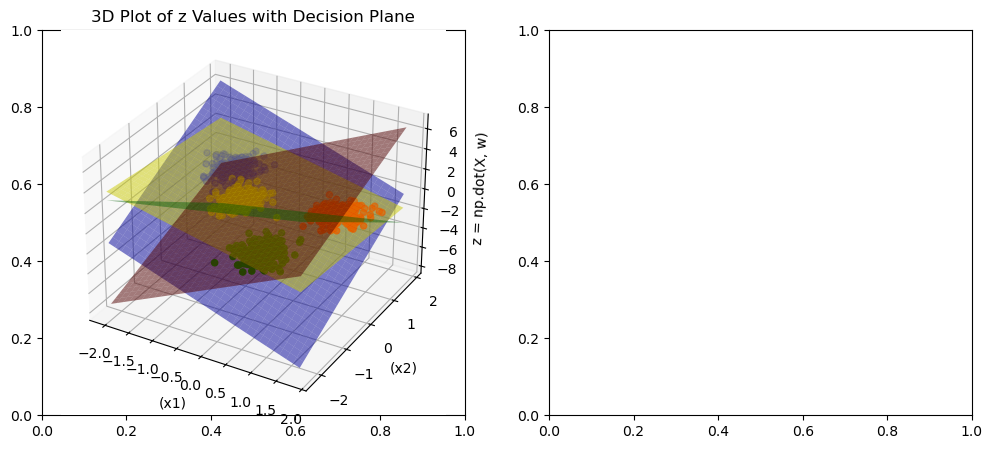

In [62]:
import numpy as np
colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}
colors_ = np.vectorize(colors.get)(y_train)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12 ,5))

### 🔹 Subplot 1: 3D Scatter + Decision Plane ###
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1, x2, c = colors_ ,marker='o', label="Data Points")

# Create a meshgrid for the decision plane
x1_range = torch.linspace(min(x1), max(x1), 30)
x2_range = torch.linspace(min(x2), max(x2), 30)
X1_mesh, X2_mesh = torch.meshgrid(x1_range, x2_range)

grid = torch.stack((X1_mesh, X2_mesh), dim=-1).reshape(-1, 2)

Z_mesh = model(grid)
Z1 = Z_mesh[:, 0]
Z2 = Z_mesh[:, 1]
Z3 = Z_mesh[:, 2]
Z4 = Z_mesh[:, 3]
Z1_mesh = Z1.reshape(X1_mesh.shape)
Z2_mesh = Z2.reshape(X1_mesh.shape)
Z3_mesh = Z3.reshape(X1_mesh.shape)
Z4_mesh = Z4.reshape(X1_mesh.shape)

Z_mesh = Z_mesh.reshape(30, 30, 4)

# Compute z-plane (decision boundary)
ax1.plot_surface(X1_mesh, X2_mesh, Z1_mesh.detach().numpy(), color=colors.get(0), alpha=0.5)
ax1.plot_surface(X1_mesh, X2_mesh, Z2_mesh.detach().numpy(), color=colors.get(1), alpha=0.5)
ax1.plot_surface(X1_mesh, X2_mesh, Z3_mesh.detach().numpy(), color=colors.get(2), alpha=0.5)
ax1.plot_surface(X1_mesh, X2_mesh, Z4_mesh.detach().numpy(), color=colors.get(3), alpha=0.5)


# Labels & Title
ax1.set_xlabel("(x1)")
ax1.set_ylabel("(x2)")
ax1.set_zlabel("z = np.dot(X, w)")
ax1.set_title("3D Plot of z Values with Decision Plane")

# Show plot
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap


#-----------------------Decision Boundary--------------------------

# Compute decision boundaries
boundary_ij = Z1 - Z2  # (w_i - w_j) * x = 0 
boundary_jk = Z2 - Z3  # (w_j - w_k) * x = 0
boundary_ik = Z1 - Z3  # (w_i - w_k) * x = 0

# Reshape to match the grid shape (200, 200)
boundary_ij = boundary_ij.reshape(X1.shape)
boundary_jk = boundary_jk.reshape(X1.shape)
boundary_ik = boundary_ik.reshape(X1.shape)

# Plot decision boundaries
plt.figure(figsize=(5,5))
plt.contour(X1, X2, boundary_ij, levels=[0], colors='red', linewidths=2, label='i vs j')
plt.contour(X1, X2, boundary_jk, levels=[0], colors='green', linewidths=2, label='j vs k')
plt.contour(X1, X2, boundary_ik, levels=[0], colors='blue', linewidths=2, label='i vs k')


#-----------------------Decision Region--------------------------

# 4. Get the predicted class for each grid point.
y_pred_grid = np.argmax(z_values_grid, axis=1)

# 5. Reshape predictions to match the meshgrid shape.
y_pred_grid = y_pred_grid.reshape(X1.shape)

# 6. Plot the decision boundary using plt.contourf.

# Use this custom colormap in your contourf call:
custom_cmap = ListedColormap(['red', 'green', 'blue'])
plt.contourf(X1, X2, y_pred_grid, cmap=custom_cmap, alpha=0.7)


#-----------------------Dataset--------------------------

plt.scatter(X_train[:, 1], X_train[:, 2], c=colors, edgecolors='k', cmap=plt.cm.RdYlBu)
plt.xlabel("x1 (GRE Score)")
plt.ylabel("x2 (CGPA)")
# plt.grid()
plt.title("Decision Boundary for Softmax Regression")
plt.show()